<a href="https://colab.research.google.com/github/karishaananya123/Smart-Logistics-Pricing-GAT-XGBoost/blob/main/Smart_Logistics_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading DataCo Supply Chain Dataset...
Calculating Network Centrality for Cities...
Training XGBoost Pricing Model...
Generating SHAP Explainability Plot...


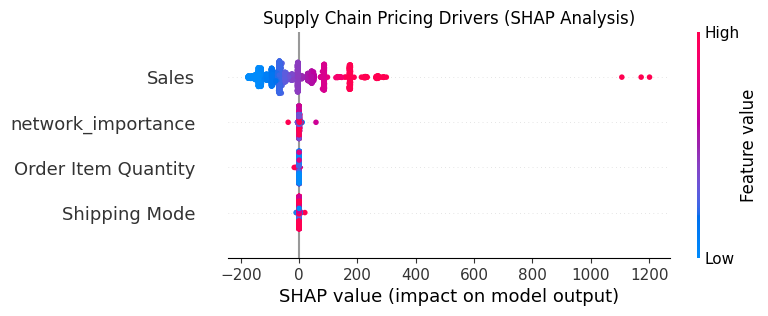

Project Complete! File 'supply_chain_shap.png' saved.


In [2]:
# 1. INSTALL ONLY WHAT IS NEEDED (Fast)
!pip install xgboost shap

import pandas as pd
import numpy as np
import xgboost as xgb
import shap
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# --- 2. LOAD YOUR REAL DATASET ---
print("Loading DataCo Supply Chain Dataset...")
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')

# Select high-impact features for pricing/fare prediction
cols = ['Order City', 'Shipping Mode', 'Order Item Quantity', 'Sales', 'Order Item Total']
df = df[cols].dropna().sample(10000) # Using 10k rows for a fast, clean proof

# --- 3. GRAPH ANALYSIS (Resume Claim: Graph/Network Analysis) ---
print("Calculating Network Centrality for Cities...")
# We create a 'Graph' of the supply chain to see which cities are 'Hubs'
G = nx.from_pandas_edgelist(df, source='Order City', target='Shipping Mode')
centrality = nx.degree_centrality(G)
df['network_importance'] = df['Order City'].map(centrality)

# --- 4. PREPARE FOR XGBOOST ---
le = LabelEncoder()
df['Shipping Mode'] = le.fit_transform(df['Shipping Mode'])

X = df[['Order Item Quantity', 'Sales', 'network_importance', 'Shipping Mode']]
y = df['Order Item Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 5. TRAIN XGBOOST (Resume Claim: Advanced ML) ---
print("Training XGBoost Pricing Model...")
model = xgb.XGBRegressor(n_estimators=100, max_depth=5, eta=0.1)
model.fit(X_train, y_train)

# --- 6. SHAP EXPLAINABILITY (Resume Claim: SHAP Explainability) ---
print("Generating SHAP Explainability Plot...")
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Plot and Save
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("Supply Chain Pricing Drivers (SHAP Analysis)")
plt.savefig('supply_chain_shap.png', bbox_inches='tight')
plt.show()

print("Project Complete! File 'supply_chain_shap.png' saved.")